# TUTORIAL: Transfer Learning with ResNet50 for image classification

*A guide to use Transfer Learning in training models.*

<img src="attachment:9cac56df-3d9d-40ad-ad17-db606bb872de.png" width=900>

## Introduction

The aim of this tutorial is to provide a guide for **Transfer Learning** with the main aspects to be considered in the process. 

For this purpose, a **Residual Neural Network** is used: **ResNet**. The task is to transfer the learning from a **ResNet50**, trained with **Imagenet** dataset, to a model that classifies flower images. 

## Definition

* 
### Transfer Learning

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned.
As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data. 

Main advantages of **Transfer Learning**:
- saving resources 
- improving efficiency 
- model training facilitation
- saving time

* 
### ResNet

[ResNet](https://en.wikipedia.org/wiki/Residual_neural_network) is a Residual neural Network structure. It is an innovative neural network created for image classification.

The **ResNet** model architecture allows the training error to be reduced with a deeper network through **connection skip**.

Residual neural networks ignore some connections and make double or triple layer jumps that contain non-linearities (ReLU).

<img src="attachment:4aa4848a-2679-4422-96ec-a85921a19b4e.png" width=300>

**Resnet50** is trained on more than a million images from the [ImageNet database](https://www.image-net.org/).

## Dataset

To show how Transfer Learning can be useful, **ResNet50** will be trained on a custom dataset. 

#### **USE CASE:** Flower Classification

To classify flower images, the **Flower Classification** dataset will be used. It is available on [Kaggle](https://www.kaggle.com/datasets/sauravagarwal/flower-classification).

>*Contains information from [Flower Classification](https://www.kaggle.com/datasets/sauravagarwal/flower-classification), which is made available here under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).*

The dataset contains 5 types of flowers: 

1) **daisy**

2) **dandelion**

3) **roses**

4) **sunflowers**

5) **tulips**

The data is distributed as follows:

<img src="attachment:412adb4b-586f-4f98-8590-f05f55b1a3f2.png" width=400>

## Code

### Step 1 - Librairies installation and import

In [1]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

In [1]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

### Step 2 - Data preprocessing

To use your data (images), you have to pre-process them. 

#### 1. Visualize dataset images

The first step is to display an image of each class to see what it looks like.

Here, there is **5 classes** (for 5 flower types).

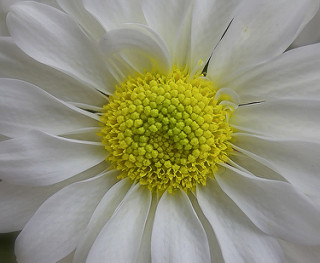

In [3]:
# daisy
img_daisy = image.load_img("C:/Users/USER/Desktop/resnet50/data_full/daisy/100080576_f52e8ee070_n.jpg")
img_daisy

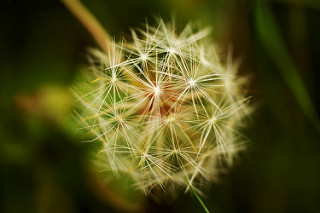

In [4]:
# dandelion
img_dandelion = image.load_img("C:/Users/USER/Desktop/resnet50/data_full/dandelion/10043234166_e6dd915111_n.jpg")
img_dandelion

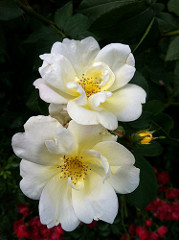

In [5]:
# roses
img_roses = image.load_img("C:/Users/USER/Desktop/resnet50/data_full/roses/10090824183_d02c613f10_m.jpg")
img_roses

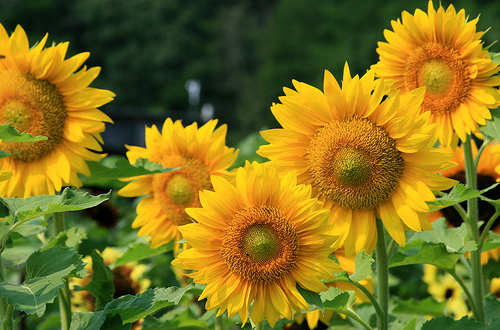

In [6]:
# sunflowers
img_sunflowers = image.load_img("C:/Users/USER/Desktop/resnet50/data_full/sunflowers/1008566138_6927679c8a.jpg")
img_sunflowers

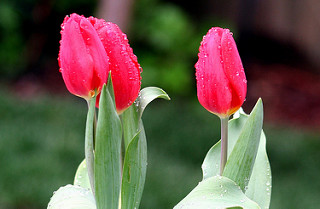

In [7]:
# tulips
img_tulips = image.load_img("C:/Users/USER/Desktop/resnet50/data_full/tulips/100930342_92e8746431_n.jpg")
img_tulips

#### 2. Split data to use a ResNet model

By using a **ResNet** model, your dataset has to be split as follow:

<img src="attachment:016f5918-d35a-4496-83a9-42843bbcd4fd.png"  width=400>

If this is not the case for your image classification dataset, follow the steps below.

1. Have a separate dataset as follows: **one folder per class**.

<img src="attachment:6cb999f7-3dfb-41df-a302-5115b27cb719.png" width=800>

2. Then play the following cell to split the dataset into training, validation and test sets.

In [8]:
# split data in a new folder named data-split
splitfolders.ratio("C:/Users/USER/Desktop/resnet50/data_full", output="C:/Users/USER/Desktop/resnet50/data_split", seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)

Your data should, now, be split as follows:

<img src="attachment:713d2de3-0894-411b-8e55-0820b5768e93.png" width=900>

#### 3. Create Keras data generators

In [9]:
datagen = ImageDataGenerator()

In [10]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [11]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/USER/Desktop/resnet50/data_split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 2934 images belonging to 5 classes.


In [14]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/USER/Desktop/resnet50/data_split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 364 images belonging to 5 classes.


In [15]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/USER/Desktop/resnet50/data_split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 372 images belonging to 5 classes.


### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [16]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [17]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

### Step 4 - Train the model

**Adam** optimizer is used to train the model over **10 epochs**. It is enough by using Transfer Learning.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [18]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

In [19]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
92/92 [==============================] - 310s 3s/step - loss: 1.9302 - accuracy: 0.2488 - val_loss: 1.4624 - val_accuracy: 0.6209
Epoch 2/10
92/92 [==============================] - 276s 3s/step - loss: 1.2952 - accuracy: 0.4557 - val_loss: 0.8936 - val_accuracy: 0.7363
Epoch 3/10
92/92 [==============================] - 277s 3s/step - loss: 0.9428 - accuracy: 0.6435 - val_loss: 0.5538 - val_accuracy: 0.8297
Epoch 4/10
92/92 [==============================] - 279s 3s/step - loss: 0.7476 - accuracy: 0.7399 - val_loss: 0.4784 - val_accuracy: 0.8379
Epoch 5/10
92/92 [==============================] - 280s 3s/step - loss: 0.5990 - accuracy: 0.7938 - val_loss: 0.4411 - val_accuracy: 0.8434
Epoch 6/10
92/92 [==============================] - 278s 3s/step - loss: 0.5613 - accuracy: 0.8149 - val_loss: 0.3917 - val_accuracy: 0.8654
Epoch 7/10
92/92 [==============================] - 270s 3s/step - loss: 0.4666 - accuracy: 0.8429 - val_loss: 0.3889 - val_accuracy: 0.8626
Epoch 8/10
92

- Display **loss** curves:

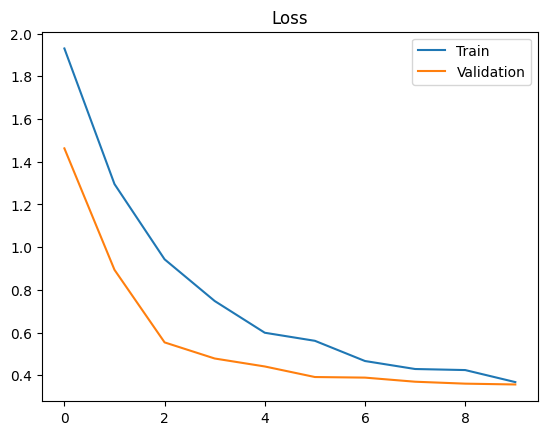

In [20]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

- Display **accuracy** curves:

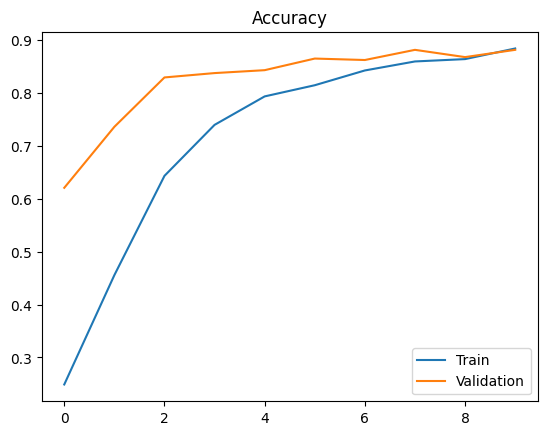

In [21]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

### Step 5 - Evaluate the model

The model is evaluated on test data.

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/12 [==============================] - 35s 3s/step - loss: 0.3705 - accuracy: 0.8898
The test loss is:  0.37046322226524353
The best accuracy is:  88.97849321365356


### Step 6 - Test the model on a new image

To test your model and predict which classes new images belong to, you can import sounds into a /workspace/data_test folder.

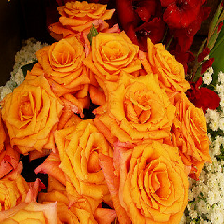

In [23]:
img = tf.keras.preprocessing.image.load_img('C:/Users/USER/Desktop/resnet50/data_full/roses/123128873_546b8b7355_n.jpg', 
                                            target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [24]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name
print(class_names[class_id.item()])

1/1 [==============================] - 1s 1s/step
[[7.4363106e-15 1.4631740e-15 9.9999666e-01 1.4670942e-12 3.3391123e-06]]
[2]
roses


### Step 7 - Save and export the model

>To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (`saved_model` in this example).

You can now save your model in a dedicated folder.

In [29]:
model.save('C:/Users/USER/Desktop/resnet50/saved_model/my_model')

INFO:tensorflow:Assets written to: C:/Users/USER/Desktop/resnet50/saved_model/my_model\assets


INFO:tensorflow:Assets written to: C:/Users/USER/Desktop/resnet50/saved_model/my_model\assets


In [30]:
model = tf.keras.models.load_model('C:/Users/USER/Desktop/resnet50/saved_model/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [31]:
model.save('C:/Users/USER/Desktop/resnet50/saved_model/my_model.h5')

c:\Users\USER\anaconda3\envs\tf\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs. 

Train and test this model on your own dataset !